# Regression Visualizers using Yellowbrick

__Regression Visualizers__

Regression models attempt to predict a target in a continuous space. Regressor score visualizers display the instances in model space to better understand how the model is making predictions. We currently have implemented three regressor evaluations:

- <font color=red>Residuals Plot:</font> plot the difference between the expected and actual values
- <font color=red>Prediction Error Plot:</font> plot the expected vs. actual values in model space
- <font color=red>Alpha Selection:</font> visual tuning of regularization hyperparameters

Estimator score visualizers wrap Scikit-Learn estimators and expose the Estimator API such that they have fit(), predict(), and score() methods that call the appropriate estimator methods under the hood. Score visualizers can wrap an estimator and be passed in as the final step in a Pipeline or VisualPipeline.

In [1]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection

<font color=red>__Residuals Plot__</font>

Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

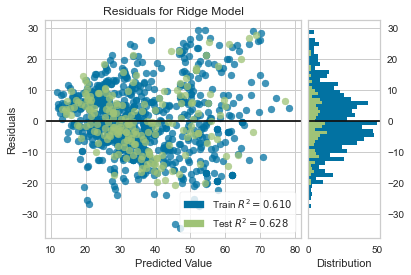

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

A common use of the residuals plot is to analyze the variance of the error of the regressor. If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate. In the case above, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well. We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.

Note that if the histogram is not desired, it can be turned off with the hist=False flag:

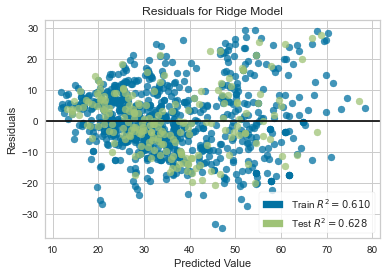

In [3]:
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

__Quick Method__

Similar functionality as above can be achieved in one line using the associated quick method, residuals_plot. This method will instantiate and fit a ResidualsPlot visualizer on the training data, then will score it on the optionally provided test data (or the training data if it is not provided).

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


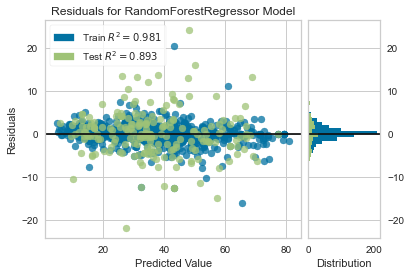

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from yellowbrick.regressor import residuals_plot
from yellowbrick.datasets import load_concrete

# Load the dataset and split into train/test splits
X, y = load_concrete()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = residuals_plot(RandomForestRegressor(), X_train, y_train, X_test, y_test)

<font color=red>__Prediction Error Plot__</font>

A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45 degree line, where the prediction exactly matches the model.

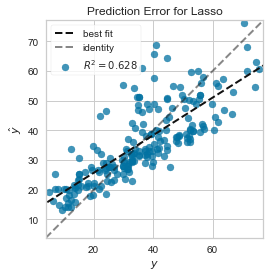

In [5]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

__Quick Method__

The same functionality can be achieved with the associated quick method prediction_error. This method will build the PredictionError object with the associated arguments, fit it, then (optionally) immediately show the visualization.

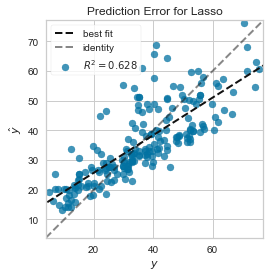

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import prediction_error

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

<font color=red>__Alpha Selection__</font>

Regularization is designed to penalize model complexity, therefore the higher the alpha, the less complex the model, decreasing the error due to variance (overfit). Alphas that are too high on the other hand increase the error due to bias (underfit). It is important, therefore to choose an optimal alpha such that the error is minimized in both directions.

The AlphaSelection Visualizer demonstrates how different values of alpha influence model selection during the regularization of linear models. Generally speaking, alpha increases the affect of regularization, e.g. if alpha is zero there is no regularization and the higher the alpha, the more the regularization parameter influences the final model.

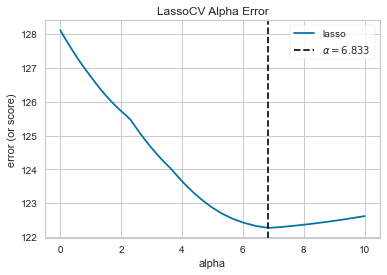

In [5]:
import numpy as np
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
from yellowbrick.datasets import load_concrete

# Load the regression dataset
X, y = load_concrete()

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas, cv=5)

visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show()

__Quick Method__

The same functionality above can be achieved with the associated quick method alphas. This method will build the AlphaSelection Visualizer object with the associated arguments, fit it, then (optionally) immediately show it.

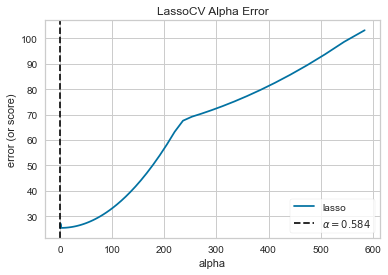

AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4C5B0C3C8>,
               is_fitted='auto', model=None)

In [8]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor.alphas import alphas

from yellowbrick.datasets import load_energy

# Load dataset
X, y = load_energy()

# Use the quick method and immediately show the figure
alphas(LassoCV(random_state=0, cv=5), X, y)